In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from keras.preprocessing.image import array_to_img

# Загрузка обучающей выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Нормализация данных
x_train, x_test = x_train / 255.0, x_test / 255.0

# Создание модели
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)), # определяем взвешенное ядро, создаёт тензор выходных данных
    MaxPooling2D((2, 2)), # уменьшает выборку, выбирает максимальное значение из подвыборки
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(), # конвертирует в вектор
    Dense(64, activation='relu'), # отвечает за соединение нейронов 
    Dense(10, activation='softmax') # и финальный результат
])

# Вы можете объединить множество таких нейронов в сеть, но это не поможет 
# - многие сложные процессы в реальной жизни не являются линейными и смоделировать их такой сетью не выйдет

# Функция активации - это своего рода фильтр, который:
# фильтрует неважную информацию и оставляет только важную в определенном формате;
# вводит необходимую нелинейность, позволяя сети учиться и моделировать сложные закономерности.


#relu: 
# if input > 0:
#   return input
# else:
#   return 0
# Берем входное число и обрезаем его до ноля, если оно отрицательное.
#


# softMax принимает список произвольных чисел и преобразует их в список вероятностей пропорциональных этим числам. То есть:
# softMax допустим, у нас есть список [1, 2, 3]: softmax([1, 2, 3]) = [0.09003, 0.24473, 0.66524]


# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Сохранение модели в файл
model.save('my_cnn_model.h5')


ModuleNotFoundError: No module named 'tensorflow'

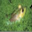

In [14]:
array_to_img(x_train[242])

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets import cifar10

# Загрузка сохраненной модели
model = load_model('my_cnn_model.h5')

# Словарь для названий классов CIFAR-10
class_names = {
    0: 'Airplane',
    1: 'Automobile',
    2: 'Bird',
    3: 'Cat',
    4: 'Deer',
    5: 'Dog',
    6: 'Frog',
    7: 'Horse',
    8: 'Ship',
    9: 'Truck'
}

# Оценка модели на тестовом наборе данных CIFAR-10
(_, _), (x_test, y_test) = cifar10.load_data()
x_test = x_test / 255.0  # Нормализация данных тестового набора

# Оценка точности модели
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

# Выбор случайного изображения из тестовой выборки
index = np.random.randint(0, x_test.shape[0])
test_image = x_test[index]
true_class = y_test[index][0]
true_class_name = class_names[true_class]

# Предобработка изображения
test_image_normalized = np.expand_dims(test_image, axis=0)

# Предсказание класса
predictions = model.predict(test_image_normalized)
predicted_class = np.argmax(predictions)
predicted_class_name = class_names[predicted_class]

# Вывод результатов
plt.imshow(test_image)
plt.title(f'True class: {true_class_name}, Predicted class: {predicted_class_name}')
plt.show()

print(f'True class: {true_class_name}')
print(f'Predicted class: {predicted_class_name}')


ModuleNotFoundError: No module named 'matplotlib'